# Visualize parameter

In [65]:
import ipywidgets as widgets
from ipywidgets import Layout
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [69]:
A = [0.2, 0.4, 0.6]
M = [0.5, 1., 1.5]
Alpha = [2, 4, 7, 10]
Beta = [2, 4, 7, 10]
Strength = [0.01, 0.05, 0.1]
Variability = ["Variability_always", "Variability_until", "Variability_only", "Variability_10"]

In [74]:
class Select_box(widgets.VBox):
    def __init__(self, dashboard):
        self.dashboard = dashboard
        
        self.selection_a = widgets.Dropdown(options=A)
        self.selection_a.observe(dashboard.on_a_selected, names = "value") 
        
        self.selection_m = widgets.Dropdown(options=M)
        self.selection_m.observe(dashboard.on_m_selected, names = "value") 
        
        self.selection_strength = widgets.Dropdown(options=Strength)
        self.selection_strength.observe(dashboard.on_strength_selected, names = "value") 
        
        self.selection_alpha = widgets.Dropdown(options=Alpha)
        self.selection_alpha.observe(dashboard.on_alpha_selected, names = "value") 
        
        self.selection_beta = widgets.Dropdown(options=Beta)
        self.selection_beta.observe(dashboard.on_beta_selected, names = "value") 
 
        self.selection_variability = widgets.Dropdown(options=Variability)
        self.selection_variability.observe(dashboard.on_variability_selected, names = "value") 


        children = [
        self.selection_a,
        self.selection_m,
        self.selection_strength,
        self.selection_alpha,
        self.selection_beta,
        self.selection_variability,
        ]
        super().__init__(children, layout=Layout(width="100%"))   

In [75]:
class Text_box(widgets.Box):
    def __init__(self, dashboard):
        self.text = widgets.HTML()
        self.dashboard = dashboard
        self.print_text()
        
        children = [
        self.text,
        ]
        super().__init__(children, layout=Layout(width="100%"))
        
    def print_text(self):
        # "<h4>Parameter</h4>a = "+
        self.text.value = str(self.dashboard.a)+"</br>m = "+str(self.dashboard.m)+"</br>strength = "+str(self.dashboard.strength)+"</br>alpha = "+str(self.dashboard.alpha) +"</br>beta = "+str(self.dashboard.beta)
        return
    
    
    def change_a(self, change):
        self.a = change
        self.print_text()
        
    def change_m(self, change):
        self.m = change
        self.print_text()
        
    def change_strength(self, change):
        self.strength = change
        self.print_text()
        
    def change_alpha(self, change):
        self.alpha = change
        self.print_text()
        
    def change_beta(self, change):
        self.beta = change
        self.print_text()

    def change_variability(self, change):
        self.variability = change
        self.print_text()

In [104]:
class Image_box(widgets.Box):
    def __init__(self, dashboard):
        self.image = widgets.Image()
        self.dashboard = dashboard
        
        self.a = self.dashboard.a
        self.m = self.dashboard.m
        self.strength = self.dashboard.strength
        self.alpha = self.dashboard.alpha
        self.beta = self.dashboard.beta
        self.variability = self.dashboard.variability
        
        self.print_image()
        
        image_container = widgets.Box([self.image], layout=Layout(width="100%"))
        
        children = [
        #image_container,
        self.image,   
        ]
        super().__init__(children, layout=Layout(width="100%"))
        
    def print_image(self):
        nom = "plot/measures/coupled/param/a="+str(self.a)+"_m="+str(self.m)+"_strength="+str(self.strength)+"_alpha="+str(self.alpha)+"_beta="+str(self.beta)+"_"+self.variability+".png"
        file = open(nom, "rb")
        image = file.read()
        plt.imshow(image)
        self.image.value = image
       # print(self.a, self.m, self.strength, self.alpha, self.beta)
        return
    
    
    def change_a(self, change):
        self.a = change
        self.print_image()
        
    def change_m(self, change):
        self.m = change
        self.print_image()
        
    def change_strength(self, change):
        self.strength = change
        self.print_image()
        
    def change_alpha(self, change):
        self.alpha = change
        self.print_image()
        
    def change_beta(self, change):
        self.beta = change
        self.print_image()

    def change_variability(self, change):
        self.variability = change
        self.print_image()

TypeError: Image data cannot be converted to float

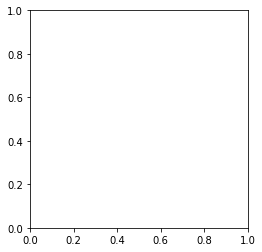

In [105]:
class Dashboard(widgets.VBox):
    def __init__(self):
        self.a = A[0]
        self.m = M[0]
        self.strength = Strength[0]
        self.alpha = Alpha[0]
        self.beta = Beta[0]
        self.variability = Variability[0]
    
        self.select_box = Select_box(self)
        self.text_box = Text_box(self)
        self.image_box = Image_box(self)
        
       # row_layout = Layout(width="50%")
        C1 = widgets.Box([self.select_box], layout=Layout(width="100%"))
        C2 = widgets.Box([self.text_box], layout=Layout(width="100%"))
        rowA = widgets.Box([C1, C2], layout=Layout(width="100%"))

        rowB = widgets.Box([self.image_box], layout=Layout(width="100%"))
        super().__init__([rowA, self.image_box], layout=Layout(width="100%"))
    
    
    
    
    def on_a_selected(self, change):
        self.a = change["new"]
        self.text_box.change_a(self.a)
        self.image_box.change_a(self.a)
        
    def on_m_selected(self, change):
        self.m = change["new"]
        self.text_box.change_m(self.m)
        self.image_box.change_m(self.m)
        
    def on_strength_selected(self, change):
        self.strength = change["new"]
        self.text_box.change_strength(self.strength)
        self.image_box.change_strength(self.strength)
        
    def on_alpha_selected(self, change):
        self.alpha = change["new"]
        self.text_box.change_alpha(self.alpha)
        self.image_box.change_alpha(self.alpha)
        
    def on_beta_selected(self, change):
        self.beta = change["new"]
        self.text_box.change_beta(self.beta)
        self.image_box.change_beta(self.beta)

    def on_variability_selected(self, change):
        self.variability = change["new"]
        self.text_box.change_variability(self.variability)
        self.image_box.change_variability(self.variability)
    
Dashboard()

In [ ]:
a=0.2_m=0.5_strength=0.01_alpha=2_beta=2_Variability_10